In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [2]:
from google.colab import files
upload = files.upload()

Saving survey[1].csv to survey[1].csv


In [3]:
df= pd.read_csv("survey[1].csv")


In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.shape

(1259, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [9]:
if df['comments'].isna().sum() / len(df) > 0.9:
    df.drop('comments', axis=1, inplace=True)
    print("Dropped 'comments' column due to excessive missing values.")


In [10]:
# Clean 'Age' column
print("\nHandling age outliers...")
print(f"Age range before cleaning: {df['Age'].min()} - {df['Age'].max()}")
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]
print(f"Age range after cleaning: {df['Age'].min()} - {df['Age'].max()}")



Handling age outliers...
Age range before cleaning: -1726 - 99999999999
Age range after cleaning: 18 - 72


In [11]:
def clean_gender(g):
    g = str(g).strip().lower()
    if re.search(r"^(m|male|man|cis male|ms|male )", g):
        return "Male"
    elif re.search(r"^(f|female|woman|cis female|fem|female )", g):
        return "Female"
    else:
        return "Other"

In [12]:
df['Gender'] = df['Gender'].apply(clean_gender)
print("\nGender categories after cleaning:")
print(df['Gender'].value_counts())



Gender categories after cleaning:
Gender
Male      986
Female    249
Other      16
Name: count, dtype: int64


<ipython-input-12-a0ef71ac6e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(clean_gender)


In [13]:
# Fill missing values in categorical columns with mode
missing_cols = df.columns[df.isnull().any()].tolist()
print("\nFilling missing values for:", missing_cols)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)



Filling missing values for: ['state', 'self_employed', 'work_interfere', 'comments']


<ipython-input-13-a936bc806373>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-13-a936bc806373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)



Visualizing key features...


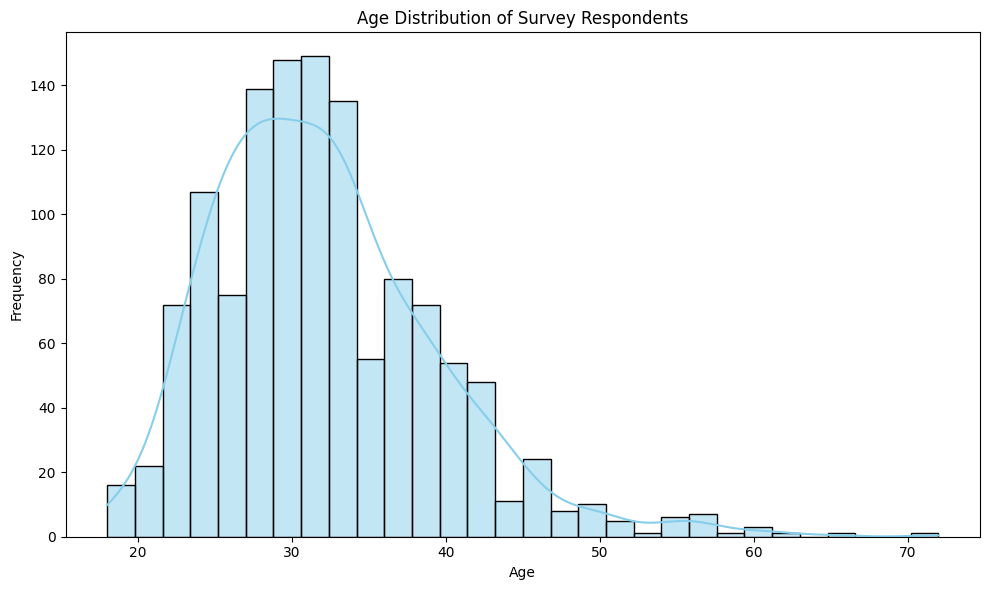

In [14]:
print("\nVisualizing key features...")

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Survey Respondents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<ipython-input-15-e0227892e39f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index, palette="Set2")


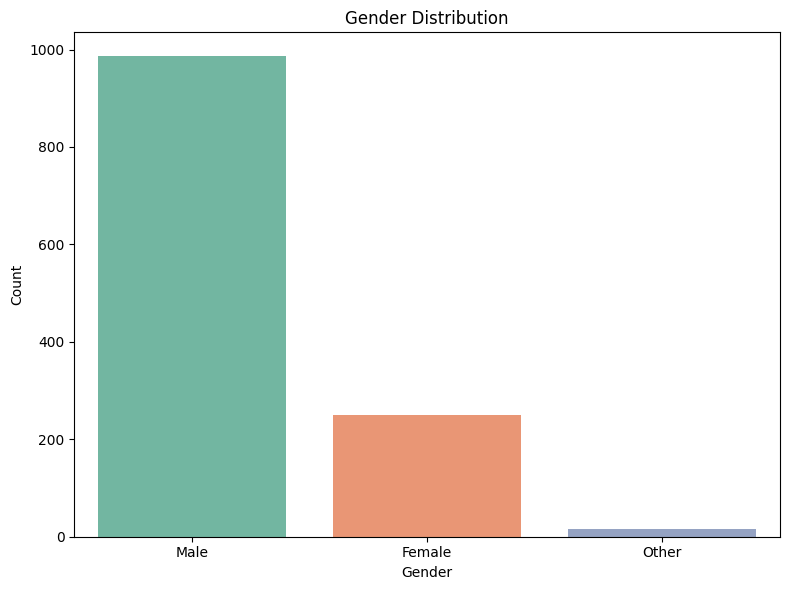

In [15]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<ipython-input-19-83d9645298eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='treatment', palette="pastel")


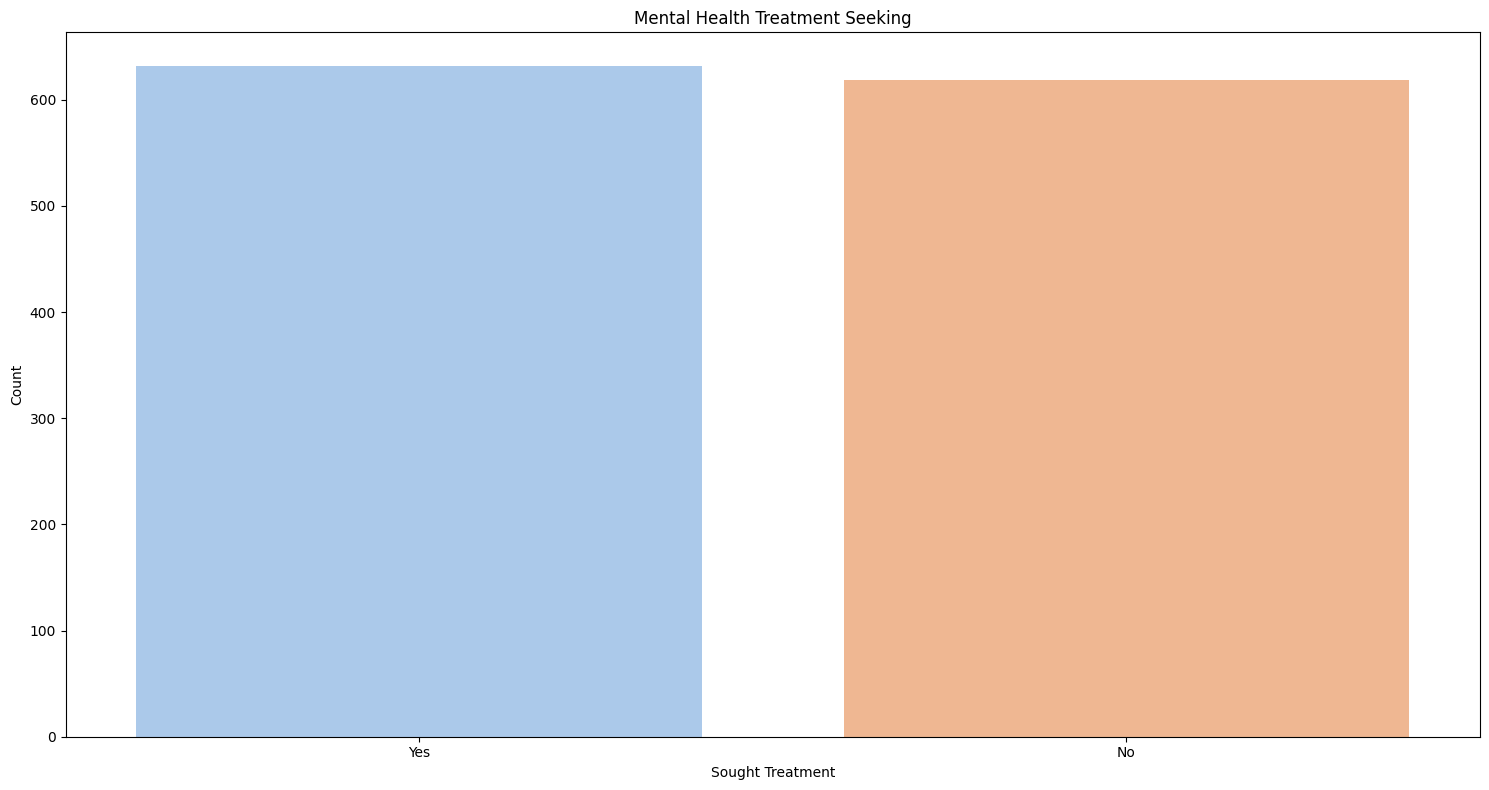

In [19]:
# Treatment distribution
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='treatment', palette="pastel")
plt.title("Mental Health Treatment Seeking")
plt.xlabel("Sought Treatment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<ipython-input-20-2d438e7a3652>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


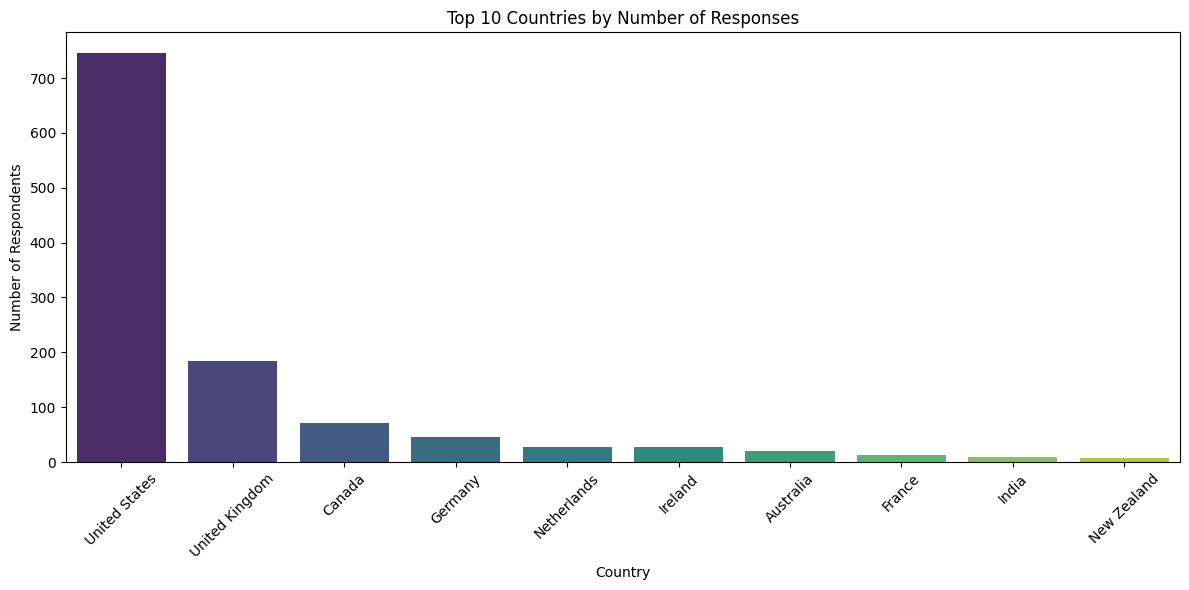

In [20]:
# Country with most responses
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries by Number of Responses")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
print("\nAnalyzing correlations...")

# Encode binary categorical columns
binary_cols = ['family_history', 'treatment', 'remote_work', 'tech_company']
df_encoded = df.copy()
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})



Analyzing correlations...


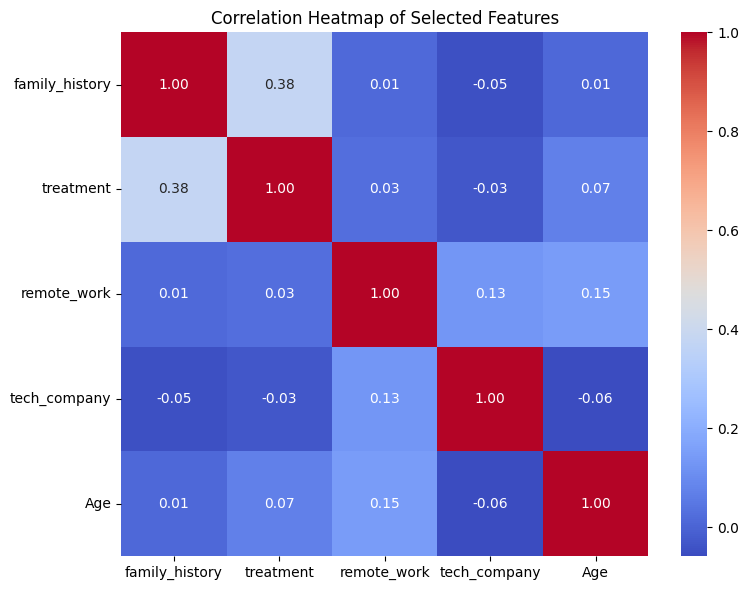

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[binary_cols + ['Age']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()

In [23]:
print("\nHypothesis Testing: Family History vs. Treatment")

# Null Hypothesis (H0): Family history does NOT affect treatment seeking.
# Alternative Hypothesis (H1): Family history DOES affect treatment seeking.

contingency = pd.crosstab(df['family_history'], df['treatment'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("\nContingency Table:")
print(contingency)
print("\nChi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("\nConclusion: Reject H0. Family history is significantly associated with treatment seeking.")
else:
    print("\nConclusion: Fail to reject H0. No significant association found between family history and treatment seeking.")



Hypothesis Testing: Family History vs. Treatment

Contingency Table:
treatment        No  Yes
family_history          
No              492  270
Yes             127  362

Chi-squared Test Results:
Chi2 Statistic: 175.9552
Degrees of Freedom: 1
p-value: 0.0000

Conclusion: Reject H0. Family history is significantly associated with treatment seeking.
